# Ch. 1 - Classification and  Regression Tree (CART)
- sequence of if-else questions about features
- <b>Objective: </b>infer class labels
- Able to capture non-linear relationships between features and labels
- Don't require features to be on the same scale
- A classification tree divides the feature space into rectangular regions. In contrast, a linear model such as logistic regression produces only a single linear decision boundary dividing the feature space into two decision regions.
- <b>Advantages:</b>
    - Simple to Understand
    - Simple to Interpret
    - Easy to use
    - Flexibility, ability to describe non-linear dependencies
    - No need to standardize or normalize features
- <b>Limitations:</b>
    - Can only produce orthogonal decision boundaries
    - senstive to small variations in training sets
    - high variance: unconstrained CARTs may overfit training set
 

### Fitting a Classification-tree using Scikit-learn

In [1]:
# Import data
from sklearn import datasets
df = datasets.load_breast_cancer()
X = df.data
y = df.target

# Import DecisionTreeClassifer
from sklearn.tree import DecisionTreeClassifier

# Import train_test_split
from sklearn.model_selection import train_test_split

# Import accuracy_score
from sklearn.metrics import accuracy_score

# Split data 80/20 for train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

#Instantiate the decision tree (dt)
dtree = DecisionTreeClassifier(max_depth=2, random_state=1)

# Fit the tree model
dtree.fit(X_train, y_train)

# Use model to predict y
y_pred = dtree.predict(X_test)

# Test the accuracy score
acc = accuracy_score(y_test, y_pred)
print('Model Accuracy = {:.2f}'.format(acc))

Model Accuracy = 0.93


### Building blocks of a decision tree
- <b>Decision Tree:</b> data structure consisting of a hierarchy of nodes
- Recursivce process which maximizes the information at each node when determining the feature and split point
- <b>Node: </b>question or prediction
    - <b>Root: </b>no parent node, question giving rise to two children nodes
    - <b>Internal Node: </b>one parent node, question giving rise to two children nodes
    - <b>Leaf: </b>one parent node, no children nodes --> <b>Prediction</b>
    
### Decision Tree for regression
- target is a continuous variable

In [2]:
# Not on a valid data set. Just for process learning purposes

# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=0.13,
            random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 0.23


# Ch. 2 - The Bias-Variance Tradeoff
#### Difficulties in estabilshing f (Approximating the prediction function)
- Overfitting: f fits the noise and not the actual relationship
    - can be shown by low training set error but high test set error
- Underfitting: f is not flexible enough to approximate the value
    - training and testing error are similar, but are relatively high
    

#### Generalization Error
- f-hat = bias**2 + variance + irreducible error
    - bias: how much f-hat and f are different. High bias models lead to underfitting
    - variance: how much f-hat is inconsistent over different training sets. high variance leads to over fitting
    
#### Goal is to find model with lowest generalization error
As model bias decreases, the variance will increase. Need to find the sweet spot of model complexity

## Diagnosing Bias and Variance Problems
- first split the data into a training and test set
- test set should only be used to evaluate final performance after the model is tuned on the training set

### Cross-Validation
- k-Fold CV: data is split into k sections, or folds. Each fold is held out of a model being fit on all other folds of the data combined as a training set. This is repeated k time, one for each fold as a test set. At the end you have a list of k error values from the process. The mean of these can be used for the models error
- <b>High Variance</b> if the error from the CV is greater than the training set error
    - you have overfit the training set
    - decrease the model complexity (ex. decrease max depth or increase the min_samples_leaf
    - gather more data
- <b>High Bias</b> if CV error is similar to training error, but both are much higher than desired error
    - Underfit the training set
    - increase the model complexity (ex. increase max depth or decresae the min_samples_leaf)
    - gather more relevant features

In [3]:
# Not on appropriate data, just for process reference

# Imports
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error as MSE

# Set Seed for reproducibility
SEED = 123

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# Instantiate Decision Tree Regressor
dtree = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.14, random_state=SEED)

# Evaluate the list of MSE obtained by 10-fold CV
# Set n_jobs to -1 in order to exploit all CPU scores in computation
MSE_CV = - cross_val_score(dtree, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs = -1)

# Fit dtree to the training set
dtree.fit(X_train, y_train)

# Predict the labels of training set
y_predict_train = dtree.predict(X_train)

# Predict labels of test set
y_predict_test = dtree.predict(X_test)

# Evaluate the MSE for each option
print('CV MSE: {:.2f}'.format(MSE_CV.mean()))
print('Train MSE: {:.2f}'.format(MSE(y_train, y_predict_train)))
print('Test MSE: {:.2f}'.format(MSE(y_test, y_predict_test)))
print('\n')
print('The CV error is higher than the training set which shows we have overfit the data. Try reducing the depth or increasing the min samples per leaf')

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


## Ensemble Learning
Solution to the limitations of CARTs
- train different models on the same dataset
- let each model make its predictions
- meta-model: aggregates predictions of individual models
- Final prediction is more robust and less prone to errors
- best results when models are skillful but in different ways

##### Example steps
- training set is fed to multiple classifiers (Decision Tree, Logistic Regression, kNN, other...)
- each model makes predictions
- predictions are fed to a "Meta-Model" which aggregates the predictions and outputs a final prediction

### Voting Classifier - Binary Classification Task
Binary Predictions are fed to the meta-model and which ever prediction has the majority is the output

In [12]:
# Import Metrics and splitting functions
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Import models to use
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier

# Import Data
from sklearn import datasets
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

# Set Seed 
SEED = 1

# Split data 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# Instantiate individual Classifiers
lr = LogisticRegression()
knn = KNN()
dtree = DecisionTreeClassifier()

# Define a list of tuples that contains the name of the model and the model itself
classifiers = [('Logistic Regression', lr), 
               ('K Nearest Neighbors', knn),
               ('Classification Tree', dtree)]

# Iterate over the defind list of tuples containing the classifiers
for clf_name, clf in classifiers:
    # Fit clf to training set
    clf.fit(X_train, y_train)
    
    # Predict the labels of the test set
    y_pred = clf.predict(X_test)
    
    # Evaluate the accuracy of the clf on the test set
    print('{}: {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))
    
# Instantiate a VotingClassifier 'vc'
vc = VotingClassifier(estimators=classifiers)

# Fit vc to the training set and predict the test labels
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)
print('Voting Classifier: {:.3f}'.format(accuracy_score(y_test, y_pred)))

Logistic Regression: 0.924
K Nearest Neighbors: 0.930
Classification Tree: 0.936
Voting Classifier: 0.942


C:\Users\16084\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\16084\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

# Ch. 3 - Bagging and Random Forests

## Bagging (Bootstrap Aggregation)
- Reduces variance of individual models in the ensemble
- Ensemble is formed by models that use the same training algorithm. However, these models are not trained on the entire set. They are trained on different subsets of the data. 
- In bootstrapping, a sample is drawn with replacement. Meaning, a sample can be pulled from the dataset more than once to be used in the model training. 
- Creates many models to use. When a new data point(s) is fed to the algorithm, each model adds it's prediction to the meta-model
- <b>Classification</b>
    - Aggregates predictions by majority voting
    - BaggingClassifier in sklearn
- <b>Regression</b>
    - Aggregates predictions through averaging
    - BaggingRegressor in sklearn

In [21]:
# Import Metrics and splitting functions
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Import models to use
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Import Data
from sklearn import datasets
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

# Set Seed 
SEED = 1

# Split data 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y, random_state=SEED)

# Instantiate a classification tree and Bagging Classifier
dtree = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=SEED)
bc = BaggingClassifier(base_estimator=dtree, n_estimators=300, n_jobs=-1)

# Fit and predict using baseline estimator
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy of Decision-tree Classifier: {:.3f}'.format(acc))

# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict the labels
y_pred = bc.predict(X_test)

# Evaluate and print accuracy
acc = accuracy_score(y_test, y_pred)
print('Accuracy of Bagging Classifier: {:.3f}'.format(acc))

Accuracy of Decision-tree Classifier: 0.906
Accuracy of Bagging Classifier: 0.947


## Out of Bag (OOB) Evaluation
- On average, for each model, 63% of the training instances are sampled
- The remaining 37% constitute the OOB instances
- These points can be used to test the model without the need for cross validation
- the OOB score is the average of all OOB scores from the Model

In [23]:
# Import Metrics and splitting functions
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Import models to use
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Import Data
from sklearn import datasets
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

# Set Seed 
SEED = 1

# Split data 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y, random_state=SEED)

# Instantiate a classification tree 
dtree = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=SEED)

# Instantiate a BaggingClassifier; set oob_score=True
bc = BaggingClassifier(base_estimator=dtree, n_estimators=300, oob_score=True, n_jobs=-1)

# Fit bc to training set
bc.fit(X_train, y_train)

# Predict the test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
test_acc = accuracy_score(y_test, y_pred)

# Extract OOB score from bc
oob_acc = bc.oob_score_

# Print the accuracy scores and compare
print('Test set accuracy: {:.3f}'.format(test_acc))
print('OOB accuracy: {:.3f}'.format(oob_acc))

Test set accuracy: 0.942
OOB accuracy: 0.925


## Random Forests (RF)
- Ensemble method that uses a decision tree as the base estimator
- Each estimator is trained on a different bootstrap sample having the same size as the training set
- RF introduces further randomization in the training of individual trees
    - d features are sampled at each node without replacement, where d is less than the total number of features
- <b>Classification</b>
    - Aggregates predictions by majority voting
    - RandomForestClassifier in sklearn
- <b>Regression</b>
    - Aggregates predictions through averaging
    - RandomForestRegressor in sklearn

In [33]:
# Import data and separate response and predictors
import pandas as pd
df = pd.read_csv('auto-mpg.csv')
X = df.drop('mpg', axis=1)
y = df['mpg']

# Basic Imports
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

# Set Seed
SEED = 1

# Split data 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=SEED)

# Instantiate a random forests regressor with 400 estimators
rf = RandomForestRegressor(n_estimators=400, min_samples_leaf=0.12, random_state=SEED)

# Fit rf to the training set
rf.fit(X_train, y_train)

# Predict the test labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print the test set RMSE
print('Test set RMSE of Random Forests: {:.2f}'.format(rmse_test))

Test set RMSE of Random Forests: 4.16


### Feature Importance
When a random forest model is trained, feature importance can be assessed
- in sklearn:
    - how much the tree nodes use a particular feature (weighted avg) to reduce impurity
    - accessed using the attribute feature_importance_ on the model(ex. rf.feature_importance_)
    
To visualize the importance of features from rf...    

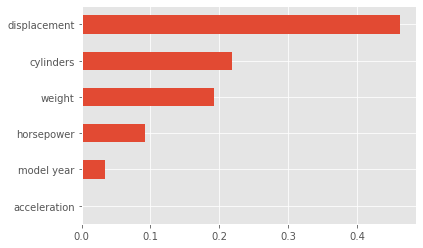

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Create a pd.Series of feature importances
importances_rf = pd.Series(rf.feature_importances_, index = X_train.columns)

# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()

# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh')
plt.show();

# Ch. 4 - Boosting
Boosting: 
- Ensemble Method combining several weak learners to form a stronger learner
- Weak Learner: Model doing just slightly better than random guessing (CART with maximum depth of 1)
- Train an ensemble of predictors sequentially, with each predictor trying to correct its predecessor

### AdaBoost (Adaptive Boosting)
    - Each predictor pays more attention to the instances wrongly predicted by it's predecesso
    - Achieved by changing the weights of training instances
    - Each predictor is assigned a coefficient -- alpha
    - alpha depends on the predictor's training error  
- <b>Classification</b>
    - Weighted majority voting
    - AdaBoostClassifier in sklearn
- <b>Regression</b>
    - Aggregates predictions through averaging
    - RandomForestRegressor in sklearn  

In [43]:
# Import Metrics and splitting functions
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# Import models to use
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# Import Data
from sklearn import datasets
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

# Set Seed 
SEED = 1

# Split data 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y, random_state=SEED)

# Instantiate the classification tree
dtree = DecisionTreeClassifier(max_depth=1, random_state=SEED)

# Instantiate an Adaboost classifier
adb_clf = AdaBoostClassifier(base_estimator=dtree, n_estimators=100)

# Fit adb_clf to training set
adb_clf.fit(X_train, y_train)

# Predict the test set probabilities of positive class
y_pred_proba = adb_clf.predict_proba(X_test)[:,-1]

# Evaluate the test set roc_auc_score
adb_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)

# Print the evaluation result
print('AdaBoost ROC AUC Score: {:.2f}'.format(adb_clf_roc_auc_score))

AdaBoost ROC AUC Score: 0.99


### Gradient Boosting (GB)
- Each predictor corrects its predecessor's error
- Does not tweak the weights of training instances
- Fit each predictor is trained using its predecessor's residual errors as labels
- Gradient Boosted Trees: base learner is a CART
- <b>Regression</b>
    - GradientBoostingRegressor in sklearn  
- <b>Classification</b>
    - GradientBoostingClassifier in sklearn

In [50]:
# Import data and separate response and predictors
import pandas as pd
df = pd.read_csv('auto-mpg.csv')
X = df.drop('mpg', axis=1)
y = df['mpg']

# Basic Imports
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

# Set Seed
SEED = 1

# Split data 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=SEED)

# Instantiate a GradientBoostingRegressor
gbt = GradientBoostingRegressor(n_estimators=300, max_depth=1, random_state=SEED)

# Fit gbt to training set
gbt.fit(X_train, y_train)

# Predict the test set labels
y_pred = gbt.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print the result
print('Gradient Boosting test set RMSE: {:.2f}'.format(rmse_test))

Gradient Boosting test set RMSE: 3.07


Gradient boosting has some limitations
- involves an exhaustive search procedure
- Each CART is trained to find the best split points and features
- May lead to CARTs using the same split points and maybe even the same features

### Stochastic Gradient Boosting (SGB)
- Each CART is trained on a random subset of training data
- sampled without replacement
- Features are sampled without replacement when choosing the best split points
- results in further ensemble diversity
- effect: adding further variance to ensemble of trees

In [52]:
# Import data and separate response and predictors
import pandas as pd
df = pd.read_csv('auto-mpg.csv')
X = df.drop('mpg', axis=1)
y = df['mpg']

# Basic Imports
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

# Set Seed
SEED = 1

# Split data 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=SEED)

# Instantiate a stochastic GradientBoostingRegressor 'sgbt'
# subsample choosing portion of data to sample for the tree
# max_features choosing portion of available features to test
sgbt = GradientBoostingRegressor(max_depth=1, subsample=0.8, max_features=0.2, 
                                 n_estimators=300, random_state = SEED)

# Fit to the training set
sgbt.fit(X_train, y_train)

# Predict the test set labels
y_pred = sgbt.predict(X_test)

# Compute and print the RMSE for the sgbt model
rmse_test = MSE(y_test, y_pred)**(1/2)
print('SGBT Test Set RMSE: {:.2f}'.format(rmse_test))

SGBT Test Set RMSE: 3.23


# Ch. 5 - Model Tuning
- Hyperparameters of a model should be tuned to obtain the best possible fit
- Parameters: learned from data in training (split point in a node)
- Hyperparameters: must be set or chosen (maximum depth of a decision tree)
- Tuning:
    - Problem: search for set of optimal hyperparameters for a learning algorithm
    - Solution: find a set of optimal hyperparameters to make the optimal model
    - Optimal Model: yields an optimal score
    - Score: in sklearn this defaults to accuracy (classification) and R2 (regression) 
- Cross Validation is used to estimate generalization performance
- Hyperparameters need to be tuned because the default values are often not optimal for all situations and problems

### Approaches to Hyperparameter Tuning
- GridSearch, RandomSearch, BaysianOptimization, GeneticAlgorithms, etc...

## Grid Search cross validation
- Manually set a grid of discrete hyperparameter values
- Set a metric for scoring model performance
- Search exhaustively through the grid
- Evaluate the models CV score for each combination of hyperparameters
- choose the best scoring combination as the optimal hyperparameters

In [56]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Set SEED
SEED = 1

# Instantiate the classifier
dtree = DecisionTreeClassifier(random_state=SEED)

# Print out dt's hyperparameters
print(pd.Series(dtree.get_params()))

ccp_alpha                            0
class_weight                      None
criterion                         gini
max_depth                         None
max_features                      None
max_leaf_nodes                    None
min_impurity_decrease                0
min_impurity_split                None
min_samples_leaf                     1
min_samples_split                    2
min_weight_fraction_leaf             0
presort                     deprecated
random_state                         1
splitter                          best
dtype: object


In [65]:
# Import Metrics and splitting functions
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV

# Import models to use
from sklearn.tree import DecisionTreeClassifier

# Import Data
from sklearn import datasets
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

# Set Seed 
SEED = 1

# Split data 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y, random_state=SEED)

# Instantiate the classifier
dtree = DecisionTreeClassifier(random_state=SEED)

# Define the grid of hyperparameters
params_dtree = {
                'max_depth':[3,4,5,6],
                'min_samples_leaf':[0.04, 0.06, 0.08],
                'max_features': [0.2, 0.4, 0.6, 0.8]
               }

# Instantiate a 10-folr CV GridSearch object
grid_dtree = GridSearchCV(estimator=dtree,
                          param_grid=params_dtree,
                          scoring='accuracy',
                          n_jobs=-1)

# Fit grid_dt to training data
grid_dtree.fit(X_train, y_train)

# Extract best hyperparameter values from grid_dtree after training
best_hyp = grid_dtree.best_params_
print('Best Hyperparameters:\n', best_hyp,'\n')

# Extract the best CV accuracy
best_CV_score = grid_dtree.best_score_
print('Best CV Accuracy: ', best_CV_score)

# Extract best model
best_model = grid_dtree.best_estimator_

# Evaluate and print the test set accuracy
test_acc = best_model.score(X_test, y_test)
print('Test Set Accuracy of Best Model: {:.3f}'.format(test_acc))

Best Hyperparameters:
 {'max_depth': 3, 'max_features': 0.4, 'min_samples_leaf': 0.04} 

Best CV Accuracy:  0.9428571428571428
Test Set Accuracy of Best Model: 0.939


## Random Forest Hyperparameter Tuning
- Same Hyperparameters as CARTs along with others such as n_estimators and bootstrap
- Hyperparameter tuning can be very computationaally expensive, and sometimes only offer slight improvement
- It is important to weight the impact of tuning to the pipeline of the whole project

In [69]:
from sklearn.ensemble import RandomForestRegressor
SEED = 1

# Inspect Random Forest Hyperparameters
rf = RandomForestRegressor(random_state = SEED)
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [76]:
df = pd.read_csv('auto-mpg.csv')
X = df.drop('mpg', axis=1)
y = df['mpg']

# Basic Imports
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV

# Set Seed
SEED = 1

# Split data 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=SEED)

# Instantiate the random forest regressor
rf = RandomForestRegressor(random_state = SEED)

# Define a grid of hyperparameters
params_rf = {
            'n_estimators':[300,400,500],
            'max_depth':[4, 6, 8],
            'min_samples_leaf':[0.1,0.2],
            'max_features':['log2','sqrt']
            }

# Instantiate a GridSearchCV object
grid_rf = GridSearchCV(estimator=rf, param_grid=params_rf,
                       cv=3, scoring='neg_mean_squared_error',
                       verbose=1, n_jobs=-1)

# Fit grid_rf to the training set
grid_rf.fit(X_train, y_train)

# Extract the best hyperparameters from grid_rf
best_hyp = grid_rf.best_params_
print('Best Hyperparameters:\n',pd.Series(best_hyp),'\n')

# Extract the best model
best_model = grid_rf.best_estimator_

# Predict the test set labels
y_pred = best_model.predict(X_test)

# Evaluate and print the test set RMSE
rmse_test = MSE(y_test, y_pred)**(0.5)
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   24.0s finished


Best Hyperparameters:
 max_depth              4
max_features        log2
min_samples_leaf     0.1
n_estimators         300
dtype: object 

Test set RMSE of rf: 4.03
